c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Mean Squared Error: 0.0126


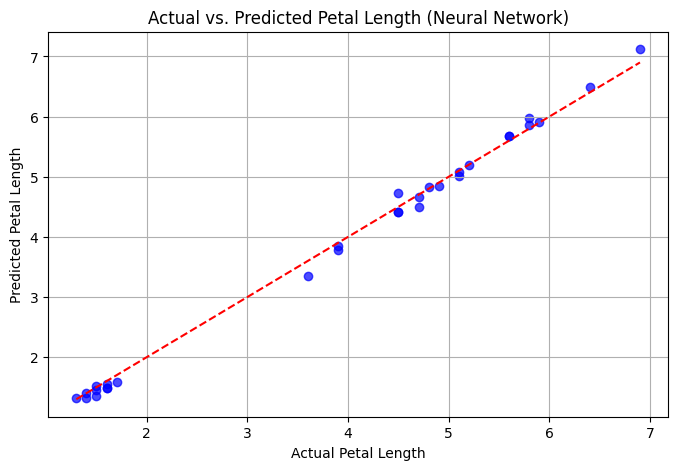

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# بارگیری داده‌های Iris از OpenML
iris = fetch_openml(name="iris", version=1, as_frame=True)
df = iris.frame

# انتخاب ویژگی‌ها و متغیر هدف
X = df.drop(columns=['class'])
y = df['petallength'].astype(np.float32)  # تبدیل به مقدار عددی

# تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ساخت مدل شبکه عصبی
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # خروجی یک نود برای مقدار عددی
])

# کامپایل مدل
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# آموزش مدل
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), verbose=0)

# ارزیابی مدل
y_pred = model.predict(X_test_scaled).flatten()
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse:.4f}")

# رسم نمودار
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # خط y=x
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Actual vs. Predicted Petal Length (Neural Network)")
plt.grid()
plt.show()
